# The TSP with Ant Colony optimization algorithm (ACO)

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

### Define the distences matrix

In [2]:
# define the distences between the cities in the map in a matrix

def loss_matrix (dataset):
    n = len(dataset)
    loss = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            loss[i][j] = np.sqrt((dataset.iloc[i].x-dataset.iloc[j].x)**2 + (dataset.iloc[i].y-dataset.iloc[j].y)**2)
    return loss

### Define the phermon matrix

In [4]:
# initialize the phermon matrix 

def phermon_matrix(dataset, phermon_cons=1):
    n= len(dataset)
    phermon = phermon_cons*np.ones((n,n))
    return phermon

### Define the ant path function

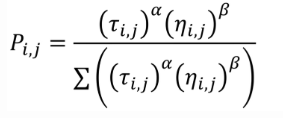

In [5]:
# define the ant path function

def ant_path(dataset, loss, phermon, alpha, beta):
    n = len(dataset)
    path = []
    position = np.random.randint(0,n)
    path.append(position)

    for i in range(n-1):
        # calculate the next position probabilities
        next_position = []
        for j in range(n):
            if j not in path:
                next_position.append(j)

        # calculate the probabilities
        probabilities = []
        for i in next_position:
            probabilities.append((phermon[path[-1]][i]**alpha)*(1/loss[path[-1]][i])**beta)

        # use the roulette wheel to choose the next position
        probabilities = np.array(probabilities)
        probabilities = probabilities/sum(probabilities)
        path.append(np.random.choice(next_position, p=probabilities))
        
    # add the first point to the path list to close the loop
    path.append(path[0])
    return path


### Define the generation function

In [7]:
# define the generation matrix

def generation_matrix(population_size,ant_path,dataset, loss,phermon_update,alpha, beta):
    gen_mat=[]
    for i in range(population_size):
        ant = ant_path(dataset, loss, phermon_update, alpha, beta)
        gen_mat.append(ant)   
    return gen_mat

### Define function to update the phermon matrix

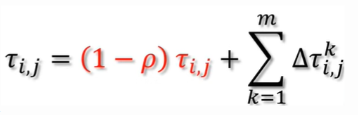

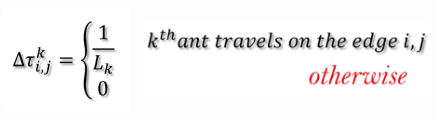

In [8]:
# update the phermon matrix

def update_phermon(phermon,gen_mat,loss,rho=.5):
    detla = np.zeros((len(phermon),len(phermon)))   
    for i in range(len(gen_mat)):
        for j in range(len(gen_mat[i])-1):
            detla[gen_mat[i][j]][gen_mat[i][j+1]] += 1/loss[gen_mat[i][j]][gen_mat[i][j+1]]
            detla[gen_mat[i][j+1]][gen_mat[i][j]] += 1/loss[gen_mat[i][j]][gen_mat[i][j+1]]
    new_phermon=phermon.copy()
    new_phermon=new_phermon*(1-rho)+detla
    return new_phermon

### Define the distence measuring function

In [34]:
# define the fitness function for distence calculation

def fitness(array,dataset):
    distance = 0
    ind=[]
    for i in array:
        ind.append(i)
    for i in range(len(ind)):
        if i < len(ind)-1:
            distance += np.sqrt((dataset.iloc[ind[i]].x - dataset.iloc[ind[i+1]].x)**2+(dataset.iloc[ind[i]].y - dataset.iloc[ind[i+1]].y)**2 )  
    return distance


### Define the Ant Colony Optimization Algorithim function

In [26]:
# define the ACO algorithm

def ACO(dataset,population_size , generations,
        loss_matrix, phermon_matrix ,generation_matrix, ant_path, update_phermon,
        rho, alpha, beta):
    
    # initialize the phermon matrix
    phermon = phermon_matrix(dataset)

    # initialize the distance matrix
    loss = loss_matrix(dataset)

    for i in range(generations):
        # generate the population
        gen_mat = generation_matrix(population_size,ant_path,dataset, loss,phermon,alpha, beta)
        # update the phermon matrix
        phermon = update_phermon(phermon,gen_mat,loss,rho)

        # condition of termination 
        # calculate the fitness of the population and select the best half of the population
        # fitness_values = [ fitness(gen_mat[i],dataset) for i in range(population_size)][:int(population_size/2)]

        # if int(np.array(fitness_values).mean()) == int(fitness_values[0]):
        #     print("The algorithm has converged at generation ", i)  
        #     break

    return gen_mat[0]

## Examine the ACO algorithm

In [39]:
# try the ACO algorithm

# read the dataset
dataset = pd.read_excel("15-Points.xlsx")


#define the ACO algorithm parameters
population_size = 20
generations = 1000
rho = .8
alpha = .5
beta = 3

# run the ACO algorithm
ACO_TSP=ACO(dataset,population_size , generations,
        loss_matrix, phermon_matrix ,generation_matrix,ant_path,update_phermon,
        rho, alpha, beta)

# print the results
print("The optimized path as follows\n",ACO_TSP,"\n")
print("The total distence for the optimized path is",fitness(ACO_TSP,dataset))

The optimized path as follows
 [9, 7, 5, 3, 10, 0, 1, 12, 14, 8, 4, 6, 2, 11, 13, 9] 

The total distence for the optimized path is 292.9650643988975


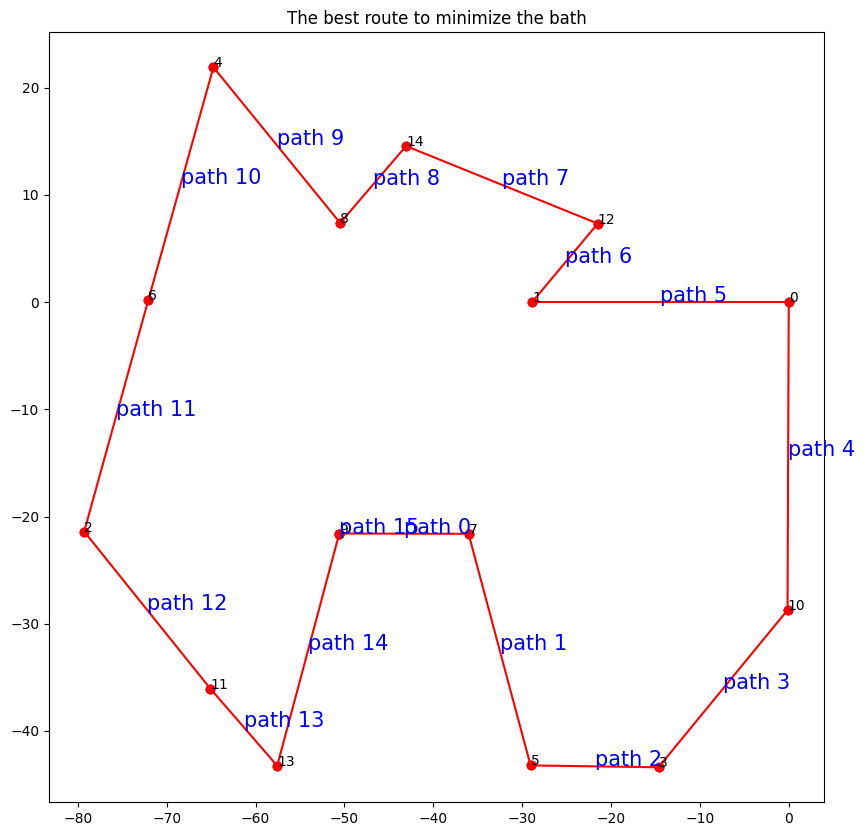

In [41]:
# plot the best solution of the Salesman problem

dataset=pd.read_excel("15-Points.xlsx")

plt.figure(figsize=(10, 10))
plt.scatter(dataset.x, dataset.y) 
plt.title("The best route to minimize the bath")
# add the city of each point
for i in range(len(dataset)):
    plt.text(dataset.iloc[i].x, dataset.iloc[i].y, str(i))

# number the pathes between the points

for i in range(len(ACO_TSP)):
    if i < len(ACO_TSP)-1:
        plt.plot([dataset.iloc[ACO_TSP[i]].x, dataset.iloc[ACO_TSP[i+1]].x], [dataset.iloc[ACO_TSP[i]].y, dataset.iloc[ACO_TSP[i+1]].y], 'ro-')
        plt.text((dataset.iloc[ACO_TSP[i]].x+dataset.iloc[ACO_TSP[i+1]].x)/2, (dataset.iloc[ACO_TSP[i]].y+dataset.iloc[ACO_TSP[i+1]].y)/2, str("path "+str(i)) , fontsize=15 , color='blue')
    else:
        plt.plot([dataset.iloc[ACO_TSP[0]].x, dataset.iloc[ACO_TSP[i]].x], [dataset.iloc[ACO_TSP[0]].y, dataset.iloc[ACO_TSP[i]].y], 'ro-')  
        plt.text((dataset.iloc[ACO_TSP[0]].x+dataset.iloc[ACO_TSP[i]].x)/2, (dataset.iloc[ACO_TSP[0]].y+dataset.iloc[ACO_TSP[i]].y)/2, str("path "+str(i)), fontsize=15 , color='blue')
